In [4]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [6]:
dataDir='../cocodata'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [7]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=15.68s)
creating index...
index created!


In [8]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
vehicle accessory food appliance sports person kitchen animal outdoor furniture indoor electronic


In [20]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );

In [29]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img['file_name']

'000000221560.jpg'

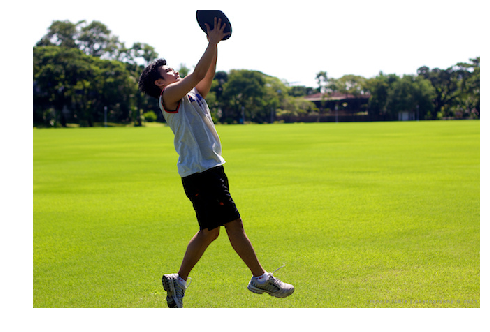

In [30]:
# load and display image
I = io.imread('../cocodata/train2017/%s'%(img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

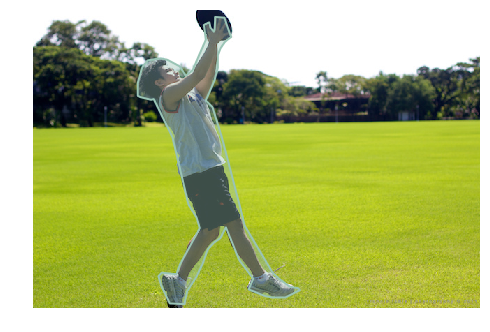

In [50]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [38]:
print('{} {} {}'.format(img['width'], img['height'], img['width'] * img['height']))

640 427 273280


In [41]:
anns

[{'area': 28111.08954999999,
  'bbox': [149.35, 9.57, 232.65, 411.69],
  'category_id': 1,
  'id': 505657,
  'image_id': 221560,
  'iscrowd': 0,
  'segmentation': [[149.35,
    104.36,
    149.35,
    122.55,
    153.18,
    124.46,
    168.5,
    128.29,
    172.33,
    127.33,
    199.14,
    181.91,
    222.12,
    278.6,
    233.61,
    296.79,
    238.39,
    312.11,
    209.67,
    364.77,
    204.88,
    378.17,
    183.82,
    376.26,
    179.03,
    381.04,
    182.86,
    394.45,
    195.31,
    420.3,
    216.37,
    421.26,
    220.2,
    403.07,
    233.61,
    382.0,
    242.22,
    363.81,
    249.88,
    342.75,
    258.5,
    333.17,
    268.07,
    326.47,
    271.9,
    318.81,
    275.73,
    311.15,
    294.88,
    358.07,
    309.24,
    377.22,
    314.98,
    384.87,
    308.28,
    400.19,
    332.22,
    409.77,
    341.79,
    411.68,
    360.94,
    411.68,
    368.6,
    407.85,
    382.0,
    401.15,
    379.13,
    398.28,
    367.64,
    396.36,
    359.

In [62]:
mask = coco.annToMask(anns[0])
mask.shape

(427, 640)

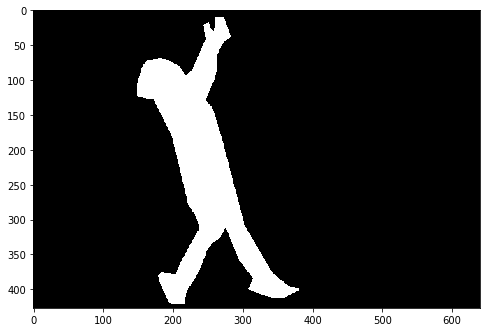

In [65]:
plt.imshow(mask, cmap=plt.cm.gray)

In [64]:
mask.max()

1

In [70]:
#import scipy.misc
import imageio
imageio.imwrite('{}.png'.format('505657'), mask * 255)

In [61]:
len(imgIds)

64115

In [71]:
import json

In [77]:
dataDir='../cocodata'
dataType='train2017'

annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );

loading annotations into memory...
Done (t=18.03s)
creating index...
index created!


In [78]:
print('starting - running through {} image ids'.format(len(imgIds)))

count = 0 

for img_id in imgIds:
    img_data = coco.loadImgs(img_id)[0]
    imf_filepath = "{}/{}/{}".format(dataDir, dataType, img_data['file_name'])
    img = io.imread(imf_filepath)
    
    annIds = coco.getAnnIds(imgIds=img_data['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    
    if len(anns) > 2:
        continue # too many people 
    
    img_area = img_data['width'] * img_data['height']
    
    total_area = 0.0
    max_area = float('-inf')
    
    for ann in anns:        
        total_area += ann['area']
        max_area = max(max_area, ann['area'])
        
#     if total_area / img_area <= 0.4:
#         continue         

    # make sure there is a dominate person in view 
    max_area_ratio = max_area / img_area
    if max_area_ratio < 0.2 or max_area_ratio > 0.7:
        continue 
    
    # masks 
    mask = None 
    for ann in anns:
        ann_mask = coco.annToMask(ann)
        if mask is None:
            mask = ann_mask
        else:
            mask += ann_mask
            
    if mask is None:
        continue 
            
    # write mask 
    imageio.imwrite('../cocodata_persons/masks/{}.png'.format(img_id), (mask * 255).astype(np.uint8))
    
    # write image 
    imageio.imwrite('../cocodata_persons/images/{}.jpeg'.format(img_id), img)
    
    # write annotations 
    ann_dic = {
        'annoations': anns
    }
    
    with open('../cocodata_persons/annotations/{}.json'.format(img_id), 'w') as f:
        json.dump(ann_dic, f)
        
    count += 1
    if count % 100 == 0:
        print('total so far {}'.format(count))

print('finished - running through 64115 image ids saving {}'.format(count))

starting - running through 64115 image ids
total so far 100
total so far 200
total so far 300
total so far 400
total so far 500
total so far 600
total so far 700
total so far 800
total so far 900
total so far 1000
total so far 1100
total so far 1200
total so far 1300
total so far 1400
total so far 1500
total so far 1600
total so far 1700
total so far 1800
total so far 1900
total so far 2000
total so far 2100
total so far 2200
total so far 2300
total so far 2400
total so far 2500
total so far 2600
total so far 2700
total so far 2800
total so far 2900
total so far 3000
total so far 3100
total so far 3200
total so far 3300
total so far 3400
total so far 3500
total so far 3600
total so far 3700
total so far 3800
total so far 3900
total so far 4000
total so far 4100
total so far 4200
total so far 4300
total so far 4400
total so far 4500
total so far 4600
total so far 4700
total so far 4800
total so far 4900
total so far 5000
total so far 5100
total so far 5200
total so far 5300
total so far

In [80]:
dataDir='../cocodata'
dataType='val2017'

annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
print(len(imgIds))

loading annotations into memory...
Done (t=0.51s)
creating index...
index created!
2693


In [81]:
print('starting - running through {} image ids'.format(len(imgIds)))

count = 0 

for img_id in imgIds:
    img_data = coco.loadImgs(img_id)[0]
    imf_filepath = "{}/{}/{}".format(dataDir, dataType, img_data['file_name'])
    img = io.imread(imf_filepath)
    
    annIds = coco.getAnnIds(imgIds=img_data['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    
    if len(anns) > 2:
        continue # too many people 
    
    img_area = img_data['width'] * img_data['height']
    
    total_area = 0.0
    max_area = float('-inf')
    
    for ann in anns:        
        total_area += ann['area']
        max_area = max(max_area, ann['area'])
        
#     if total_area / img_area <= 0.4:
#         continue         

    # make sure there is a dominate person in view 
    max_area_ratio = max_area / img_area
    if max_area_ratio < 0.2 or max_area_ratio > 0.7:
        continue 
    
    # masks 
    mask = None 
    for ann in anns:
        ann_mask = coco.annToMask(ann)
        if mask is None:
            mask = ann_mask
        else:
            mask += ann_mask
            
    if mask is None:
        continue 
            
    # write mask 
    imageio.imwrite('../cocodata_persons/masks/val_{}.png'.format(img_id), (mask * 255).astype(np.uint8))
    
    # write image 
    imageio.imwrite('../cocodata_persons/images/val_{}.jpeg'.format(img_id), img)
    
    # write annotations 
    ann_dic = {
        'annoations': anns
    }
    
    with open('../cocodata_persons/annotations/val_{}.json'.format(img_id), 'w') as f:
        json.dump(ann_dic, f)
        
    count += 1
    if count % 100 == 0:
        print('total so far {}'.format(count))

print('finished - running through {} image ids saving {}'.format(len(imgIds), count))

starting - running through 2693 image ids
total so far 100
total so far 200
total so far 300
finished - running through 2693 image ids saving 336
